<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/600_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%9D%B4%EC%83%81%EC%B9%98(Outlier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.google.com/document/d/1j5Gsz_ZQ8ZRK-sgVbJ8RETaFl4SF_c8u1MqH0suwgwY/edit

### 【데이터 전처리】 머신러닝, 전에 하는 데이터 전처리


- 데이터 전처리(Data Preprocessing)란 수행하고자 하는 분석에 적합하게 데이터를 가공하는 작업을 의미한다.  
- 결측값이나 이상치가 존재하거나, 분석 도구에 적합하지 않을 정도로 많은 변수는 분석 결과의 품질을 떨어 뜨린다. 이를 방지하기 위해 분석을 수행하기 전에  데이터 전처리 과정을 수행한다.
- 데이터 전처리 종류
1. 데이터 클리닝(Cleaning)  
    - 결측치 처리
    - 이상치(Outlier) 확인 및 정제




2. 데이터 통합(Integration)
    - 다양한 로그 파일 및 데이터베이스의 통합
    - 일관성 있는 데이터 형태로 변환




3. 데이터 변환(Transformation)
    -  스케일링(scaling) - 표준화(Standardization)와 정규화(Normalization)
    -  요약(summarization)
    -  계층 생성
4. 데이터 축소(Reduction)
    – 축소된 데이터도 원래 데이터와 같은 분석 결과를 얻을 수 있어야 함.  
    – 컴퓨팅 시간 등 고려 위해 데이터 축소가 필요  
    – 방대한 로그 데이터의 경우 일정 시간 단위로 데이터 축소 필요  
5. 데이터 이산화(Discretization)
    – 데이터 축소의 일종이나 중요시 됨   
    – 수치 값을 속성 값으로 변환   
      예) [0~0.5) : Low, [0.5~1.0] : High   
    – 많은 알고리즘은 데이터 이산화 과정이 요구됨   
 6. 데이터 표현 특징 추출(Descriptive Characteristics Mining)
    – 데이터를 더 잘 이해하기 위해 대표 특징을 이해하는 과정   
    – 데이터 축소의 일종이기도 함    
    – 실제 도메인을 고려한 방법이 많이 사용됨   
       예) 가속도 센서: 가속도 특성에 따른 연산 필요
      예) GPS 센서: GPS 데이터 특성에 따른 연산 필요
7. 불균형 데이터 처리(imbalanced data ) - 언더 샘플링, 오버 샘플링
8. 데이터 분할(Splitting Data)- train, test데이터 분할

### 【이상치(Outlier)】
- 이상치= 이상값 = 특이값 = 특이치
- 이상치(Outlier)란, 보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값을 말한다.
- 어떤 의사결정을 하는데 필요한 데이터를 분석 혹은 모델링할 경우, 이러한 이상치가 의사결정에 큰 영향을 미칠 수 있기 때문에 데이터 전처리 과정에서의 적절한 이상치 처리는 필수적이다.
-  하지만 앞서 말한 ‘데이터의 범위에서 많이 벗어난’ 혹은 ‘아주 작은/큰’이라는 것은 정확히 어떤 기준으로 판단할 수 있을까?
- 데이터에서 이상치를 탐지하기 위한 방법  
 (1)표준편차(Standard Deviation)  
 (2) IQR(Interquartile Range) with Box plots  - 탐색적 데이터 분석(EDA)의 선구자인 John Tukey가 개발  
 (3) Isolation Forest  
 (4) DBScan(Density Based Spatial Clustering of Applications with Noise)  


## 이상치 확인

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
m=[1,2,3,4,5,6,7,8,9,10,20]

pd.DataFrame(m).describe()

,0
count,11.000000
mean,6.818182
std,5.231026
min,1.000000
25%,3.500000
50%,6.000000
75%,8.500000
max,20.000000


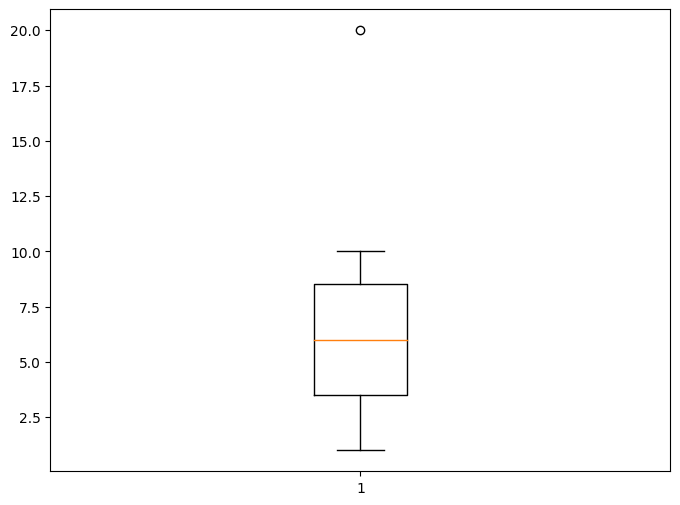

In [7]:
fig = plt.figure(figsize=(8,6))
m= [1,2,3,4,5,6,7,8,9,10,20]
plt.boxplot(m)
plt.show()

<function twinx at 0x7f564625cd30>


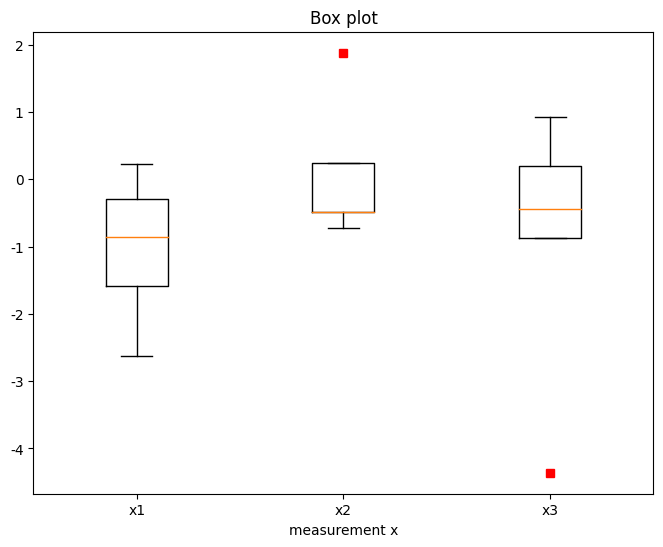

In [9]:
# 음수값이 제대로 표현되지 않은 경우 설정
#UserWarning: Glyph 8722 (\N{MINUS SIGN})
plt.rcParams['axes.unicode_minus'] =False

x1 = [-0.46,-1.25,-2.62,0.22]
x2 = [0.24,1.88,-0.49,-0.73,-0.49]
x3 = [-0.44,0.93,0.19,-4.36,-0.88]


fig = plt.figure(figsize=(8,6))

plt.boxplot([x for x in [x1, x2, x3]], 0, 'rs', 1)
print(plt.twinx)
plt.xticks([y+1 for y in range(len([x1, x2, x3]))], ['x1', 'x2', 'x3'])
plt.xlabel('measurement x')
t = plt.title('Box plot')
plt.show()


In [10]:
m = [1,2,3,4,5,6,7,8,9,10,20]
#m=[24,28,37,43,47,59,67,75,77]
#m=[1,2,2,3,4,4,5,5,6,6,7,9]
q1 =np.percentile(m,25)
q2 = np.percentile(m,50)
q3=np.percentile(m,75)
irq=q3-q1

print('Q1:',q1)
print('Q2:', q2)
print('Q3:',q3)
print('IRQ :',irq)
print('MIN:', q1-1.5*irq)
print('MAX:', q3+1.5*irq)

Q1: 3.5
Q2: 6.0
Q3: 8.5
IRQ : 5.0
MIN: -4.0
MAX: 16.0


wine 데이터 세트의 'color_intensity'컬럼에서 IQR 방식으로 이상치 검색

In [21]:
from sklearn.datasets import load_wine

wine_load = load_wine()
print(dir(wine_load))
#print(wine_load)
print(wine_load.feature_names)

wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['class']= wine_load.target
print(wine['class'].unique())

wine['class']=wine['class'].map({0:'class_0',1:'class_1',2:'class_2'})




wine.head()

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


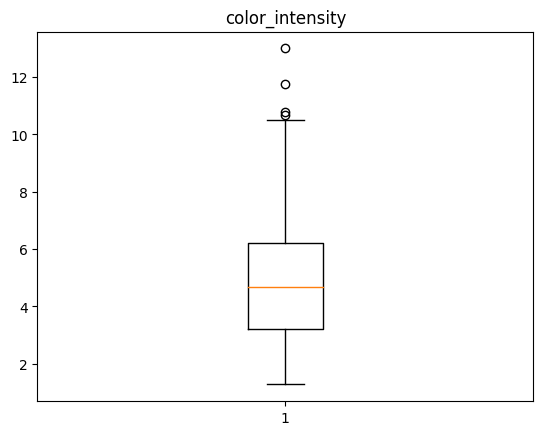

In [38]:
plt.boxplot(wine['color_intensity'],whis =1.5)
plt.title('color_intensity')
plt.show()

In [39]:
wine['color_intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: color_intensity, dtype: float64

In [37]:
d= wine['color_intensity'].describe()
print(dir(d))
print(type(d))
print(d[0],d['count'])
print(d[1],d['mean'])

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '

In [34]:
# 앞의 Box Plot을 그려 데이터의 이상치를 함수로 만들어 이상치의 위치와 값을 확인한다.

def outliners_iqr(dt,col):
  quartitle_1, quartitle_3 = np.percentile(dt[col],[25,75])
  iqr = quartitle_3 - quartitle_1
  lower_whis = quartitle_1 - (iqr * 1.5)
  upper_whis = quartitle_3 + (iqr * 1.5)
  print('lower_whis:',lower_whis)
  print('upper_whis:',upper_whis)
  outliners= dt[(dt[col]>upper_whis) | (dt[col]<lower_whis)]

  return outliners[[col]]

outliners = outliners_iqr(wine, 'color_intensity')
outliners


lower_whis: -1.2500000000000009
upper_whis: 10.670000000000002


,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 이상치 정제
- 이상치를 정제하는 방법은 이상치를 가진 행을 삭제하는 방법과 이상치를 적절한 값으로 정제하는 것이다.
- 이상치를 정제하는 것은 결측치를 정제하는 방법과 같은 방식으로 함께 수행하는 것이 편리하다.

(1) 이상치제거

In [43]:
drop_outliners = wine.drop (index=outliners.index)
#print(drop_outliners)

print('Original:',wine.shape)
print('Drop Outliners:',drop_outliners.shape)

Original: (178, 14)
Drop Outliners: (174, 14)


(2) 이상치 대체

In [49]:
#wine 데이터세트의 'color_intensity' 컬럼의 이상치를 평균값으로 대체
# 이상치를 NaN으로 변경
wine.loc[outliners.index,'color_intensity'] = np.NaN  #np.NaN은 실수값
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliners.index,'color_intensity']




151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [50]:
data = {
    'A' : [50,60,70],
    'B' : [10,np.nan,30]
}

df= pd.DataFrame(data)
df

,A,B
0,50,10.0
1,60,NaN
2,70,30.0


In [54]:
print(df['B'].mean())
df['A'].mean()

20.0


60.0

In [55]:
df['B'].mean(skipna=False)  #nan값이 있으면 계산이 안된다. True가 기본임

nan

In [57]:
df.mean()

A    60.0
B    20.0
dtype: float64

In [61]:
df.mean(axis=1)

0    30.0
1    60.0
2    50.0
dtype: float64